<a href="https://colab.research.google.com/github/AmtulYasmeen/Hello-World/blob/master/cnn_cifar_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pickle
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -P datasets
!tar xf datasets/cifar-10-python.tar.gz -C datasets

--2020-08-27 09:33:12--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘datasets/cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  96.1MB/s    in 1.7s    

2020-08-27 09:33:14 (96.1 MB/s) - ‘datasets/cifar-10-python.tar.gz’ saved [170498071/170498071]



In [4]:
# read in the cifar10 dataset
with open('datasets/cifar-10-batches-py/data_batch_1', 'rb') as input_file:
  X = pickle.load(input_file, encoding='latin1')

In [5]:
X = X['data']

In [6]:
X.shape #batch_size, height*width*channels -- 10k, 32x32x3

(10000, 3072)

In [8]:
# reshape
X = X.reshape((-1,3,32,32))
X.shape

(10000, 3, 32, 32)

In [9]:
# change the representation of image tensors .. use transpose

X = X.transpose(0,2,3,1) # using indices to change representation
X.shape

(10000, 32, 32, 3)

In [10]:
X=X.reshape(-1,3*32*32) #making each img as 1d tensor
X.shape

(10000, 3072)

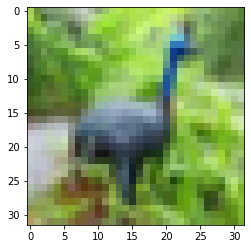

In [11]:
plt.imshow(X[6].reshape(32,32,3)) # reshape one 1d tensor into an img of 32x32x3

In [12]:
X=X-X.mean(axis=0)
X = X/np.std(X, axis=0)  #mean centering and unit scaling,  help ml models

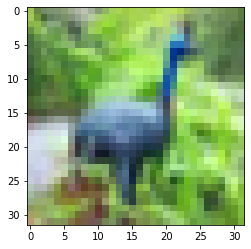

In [13]:
def show(i): #helper function for stndization
  i =i.reshape((32,32,3))
  m,M = i.min(), i.max()
  plt.imshow((i-m)/(M-m))
  plt.show()
show(X[6])

In [15]:
X_subset = X[:1000]

In [16]:
# whitening .. decorrelating features in input images .. 
# covariance is measure of strenght of the relationship btw 2 variable
# its a data transformation s.t. its covariance matrix is identitu matrix ..effect of whitening is to decorrelate features
cov = np.cov(X_subset, rowvar=True)
cov.shape

(1000, 1000)

In [17]:
# extracting latent factors in  our cov matrix, they help in cal. the principal components of image features
# we decompose matrix using singular value decomposition  which performs factor anaysis
U,S,V = np.linalg.svd(cov)

In [18]:
print(U.shape)
print(S.shape)
print(V.shape)

(1000, 1000)
(1000,)
(1000, 1000)


In [23]:
epsilon = 1e-5

In [24]:
zca_matrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T))

In [25]:
zca_matrix.shape #contains the principal compponents of our image feature

(1000, 1000)

In [26]:
# dot product or multiplying zca matrix witc PC .. with the original images.. result in whitening .. every img will have decorelated features
zca = np.dot(zca_matrix,X_subset)
zca.shape

(1000, 3072)

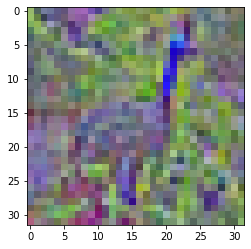

In [27]:
show(zca[6])